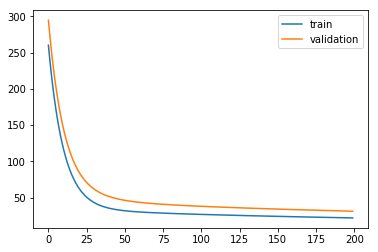

In [6]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


def loss(x, y, w):
    return np.dot((y - np.dot(x, w)).T, (y - np.dot(x, w))) / 2


X,y = load_svmlight_file("housing_scale")
X = X.toarray()
X = np.c_[np.ones((X.shape[0],1)),X]
W = np.zeros((X.shape[1]))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.33)

y_t = y_test
time = 200
loss_train = np.zeros((time),np.float)
loss_validation = np.zeros((time),np.float)
learning_rate = 0.00003

for i in range(0, time):
    G = np.dot(np.dot(X_train.T, X_train), W) - np.dot(X_train.T, y_train)
    D = -G

    W = W + learning_rate * D
    
    loss_train[i] = loss(X_train, y_train, W)
    loss_validation[i] = loss(X_test, y_test, W)

loss_train = loss_train / X_train.shape[0]
loss_validation = loss_validation / X_test.shape[0]
plt.plot(loss_train, label = 'train')
plt.plot(loss_validation, label = 'validation')
plt.legend()
plt.show()

